# Analysis of the HCP data model-fitting

Approximate run duration: 10-20 seconds

The model-fitting methods on the data from the Human Connectome Project (HCP) let us view how well the parameters fit the model. 

The HCP (a.k.a."original" or main HCP, HCP Young Adult, HCP-YA) maps the healthy human connectome by collecting and freely distributing neuroimaging and behavioral data on 1,200 normal young adults, aged 22-35. This notebook contains the post-analysis in which we determine how well the parameters fit the model using the model-fitting method.

After fitting the model to the empirical BOLD signal, one may get a set of model parameters that fit the model well. We can use the forward model and the fitted model parameters to generate simulated BOLD data, fit the model again to the simulated BOLD signal with the fitted model parameters (true values), and the new model-fitted data are saved at the files with the `idt` suffix. 

In this analysis, we demonstrate how well they fit.

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
cd /content/drive/MyDrive/Work/Sciencing/Google_CoLab_projects/WWD_Model/WWD_pytorch/wwd-model-fitting/final/

/content/drive/MyDrive/Work/Sciencing/Google_CoLab_projects/WWD_Model/WWD_pytorch/wwd-model-fitting/final


## Setup

In [3]:
import matplotlib.pyplot as plt # for plotting 
import numpy as np # for numerical operations 
import pandas as pd # for data manipulation 
import seaborn as sns # for plotting
import time # for timing the results
import warnings # for suppressing warnings and output
warnings.filterwarnings('ignore')

In [4]:
start_time = time.time() # Time it. How long does it take?

## Initialize variables

Import the HCP data and corresponding connectivity matrix files.

In [5]:
base_dir = '../data/HCP/'#'../data/HCP/Outputs/' # base directory for test HCP data
base_raw_dir = '/content/drive/MyDrive/Work/Sciencing/Data/HCP_test/'#'../data/HCP/' # base directory for test HCP data
ts_file = base_dir + 'HCP_ts.npy' # HCP functional connectivity data from the HCP dataset
sc_file = base_dir + 'HCP_sc.npy' # HCP structural connectivity data
ts_sim_file = base_dir + 'HCP_ts_sim_2p.npy' # HCP functional connectivity data from the simulations
ts_sim_idt_file = base_dir + 'HCP_ts_sim_2p_idt.npy' # HCP simulated functional connectivity file with the 
                                                     # model-identified parameters 

paras_file = base_dir + 'HCP_fitparas_2p.npy' # fitted parameters file 
paras_idt_file = base_dir + 'HCP_fitparas_2p_idt.npy'# new model-fitted data 
ts_test_file = base_dir + 'HCP_ts_test_2p.npy' # test data from HCP 
ts_test_idt_file = base_dir + 'HCP_ts_test_2p_idt.npy' # test data from HCP 

## Load the variables

In [6]:
HCP_ts_data = np.load(ts_file, allow_pickle=True)
HCP_sc_data = np.load(sc_file, allow_pickle=True)
HCP_ts_sim_data = np.load(ts_sim_file, allow_pickle=True)
HCP_ts_sim_idt_data = np.load(ts_sim_idt_file, allow_pickle=True)

HCP_para_data = np.load(paras_file, allow_pickle=True)
HCP_para_idt_data = np.load(paras_idt_file, allow_pickle=True)
HCP_ts_sim_data = np.load(ts_sim_file, allow_pickle=True)
HCP_ts_test_data = np.load(ts_test_file, allow_pickle=True)
HCP_ts_test_idt_data = np.load(ts_test_idt_file, allow_pickle=True)

In [7]:
HCP_ts = HCP_ts_data.item()
HCP_sc = HCP_sc_data.item()
HCP_ts_sim = HCP_ts_sim_data.item()
HCP_ts_sim_idt = HCP_ts_sim_idt_data.item()

HCP_para = HCP_para_data.item()
HCP_para_idt = HCP_para_idt_data.item()
HCP_ts_test = HCP_ts_test_data.item()
HCP_ts_test_idt = HCP_ts_test_idt_data.item()

## Plot the connectivity weight matrices

## Model parameter fitting estimation

How well do the parameters fit to the model? Test how much error there is for each parameter value that can be fit.

In [14]:
start_time = time.time()
mask = np.tril_indices(83,-1)

data_dict = {}
data_max = {}

data_dict['gIE'] = []
data_dict['gEI'] = []


data_max['gIE'] = []
data_max['gEI'] = []

para_name = ['gIE', 'gEI']

"""
Across the HCP test subjects, take the maximum of the absolute value of the mean of the parameter 
values identified for the model and the same for the parameter values. Append the two values and 
add them to the `data_max` dictionary for the coupling strength parameters. 
"""

for sub in HCP_para:
    
    
    data_max['gIE'].append(max(np.abs(HCP_para_idt[sub][0]), np.abs(HCP_para[sub][0])))
    data_max['gEI'].append(max(np.abs(HCP_para_idt[sub][1]), np.abs(HCP_para[sub][1])))
"""
Take these parameter values and use these maximum values to normalize the range of parameter values. 
"""
    
for sub in HCP_para:
    
    
    data_dict['gIE'].append((HCP_para_idt[sub][0]- HCP_para[sub][0])/max(data_max['gIE']))
    data_dict['gEI'].append((HCP_para_idt[sub][1] - HCP_para[sub][1])/max(data_max['gEI']))
    

data_dict['gIE'] = np.array(data_dict['gIE'])
data_dict['gEI'] = np.array(data_dict['gEI'])

Plot the results.

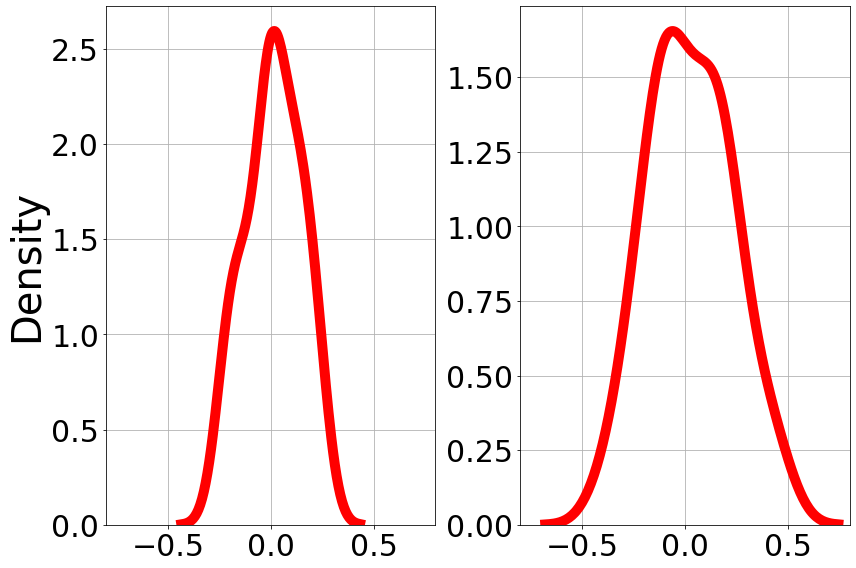

In [17]:
fig, ax = plt.subplots(1,2, figsize=(12,8), sharex=True)
plt.rcParams["axes.labelsize"] = 40
for i in range(2):
    sns.kdeplot(ax=ax[i%2], data=data_dict[para_name[i]], color='r', linewidth=10)
    #ax[i//2, i%2].set_title('hist of error of ' + para_name[i] +' across subjects', fontsize = 20)
    ax[ i%2].set_xlim(-.8,.8)
    ax[i%2].tick_params(labelsize = 30)
    ax[i%2].grid()
    if i%2 == 1:
        ax[i%2].set_ylabel('')
fig.tight_layout()
plt.show()
# fig.savefig(base_dir+'HCP_hist_modelparaserror_normalized_pt.png')

Plot the histogram of errors of parameters across subjects. 

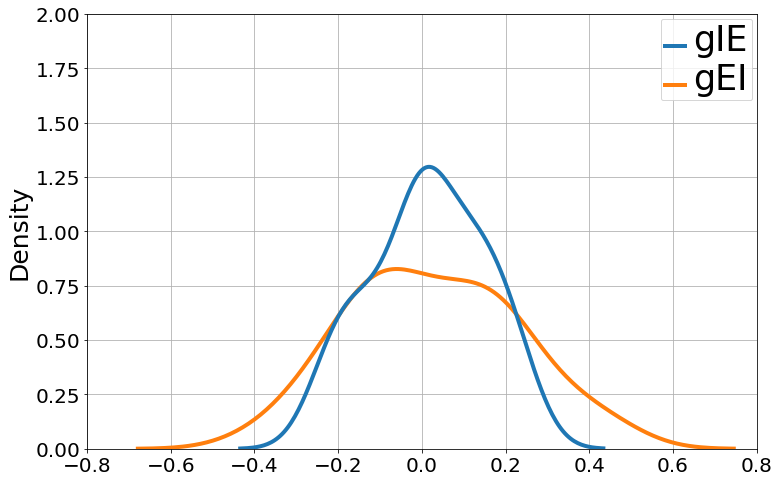

In [19]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
plt.rcParams["axes.labelsize"] = 25
sns.kdeplot(data=pd.DataFrame(data_dict), linewidth=4)
#ax.set_title('hist of error of parameters across subjects', fontsize =25)
ax.tick_params(labelsize=20)
ax.set_xlim(-0.8,0.8)
ax.set_ylim(0,2)
ax.grid()
plt.setp(ax.get_legend().get_texts(), fontsize='35')
plt.setp(ax.get_legend().get_title(), fontsize='50')
plt.show()
# fig.savefig(base_dir+'HCP_hist_modelparaserror_normalized_in1fig_pt.png')

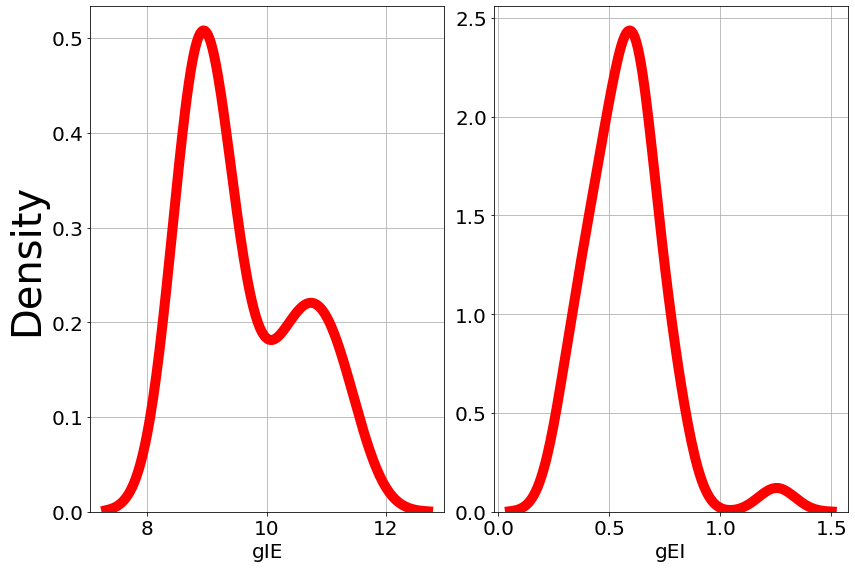

In [22]:
fig, ax = plt.subplots(1,2, figsize=(12,8))
plt.rcParams["axes.labelsize"] = 40
mask = np.tril_indices(83,-1)
data_dict = {}

data_dict['gIE'] = []
data_dict['gEI'] = []

para_name = ['gIE', 'gEI'] #, 'cA', 'cB', 'cC']

"""
Get the mean of the parameters in the dictionary of data. 
"""

for sub in HCP_para: 
    
    data_dict['gIE'].append(HCP_para[sub][0])
    data_dict['gEI'].append(HCP_para[sub][1])
    """
    data_dict['cA'].append(HCP_para[sub][-10:,4].mean())
    data_dict['cB'].append(HCP_para[sub][-10:,5].mean())
    data_dict['cC'].append(HCP_para[sub][-10:,6].mean())
    """

data_dict['gIE'] = np.array(data_dict['gIE'])
data_dict['gEI'] = np.array(data_dict['gEI'])

"""
data_dict['cA'] = np.array(data_dict['cA'])
data_dict['cB'] = np.array(data_dict['cB'])
data_dict['cC'] = np.array(data_dict['cC'])
"""
for i in range(2):
    sns.kdeplot(ax =ax[i%2], data= data_dict[para_name[i]], color='r', linewidth = 10)
    #ax[i//2, i%2].set_title('hist of ' + para_name[i] +' across subjects', fontsize = 20)
    ax[i%2].tick_params(labelsize = 20)
    ax[i%2].set_xlabel(para_name[i], fontsize = 20)
    ax[i%2].grid()
    if i%2 == 1:
        ax[i%2].set_ylabel('')
fig.tight_layout()  
plt.show()
#fig.savefig(base_dir+'HCP_hist_modelparas.png')

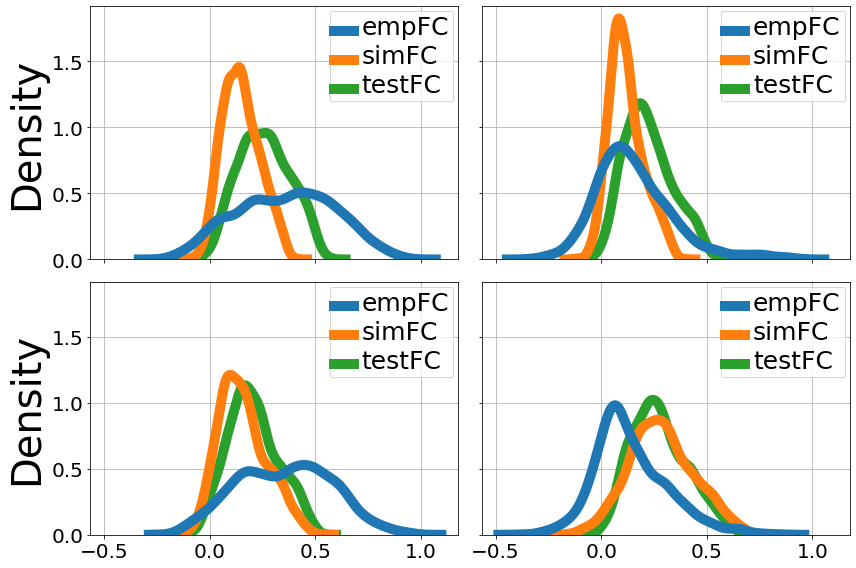

In [23]:
fig, ax = plt.subplots(2,2, figsize=(12,8), sharex=True, sharey=True)
plt.rcParams["axes.labelsize"] = 20
i = 0
mask = np.tril_indices(83,-1)
for sub in ['156637', '257542', '153025', '280941']: 
  if i < 4:
    data_dict = {}
    data_dict['empFC'] = np.corrcoef(HCP_ts[sub].T)[mask]
    data_dict['simFC'] = np.corrcoef(HCP_ts_sim[sub][:,10:])[mask]
    data_dict['testFC'] = np.corrcoef(HCP_ts_test[sub])[mask]
    sns.kdeplot(ax =ax[i//2, i%2], data=pd.DataFrame(data_dict), linewidth=10)
    #ax[i//2, i%2].set_title('s'+sub, fontsize= 30)
    ax[i//2, i%2].tick_params(labelsize=20)
    ax[i//2, i%2].grid()
    plt.setp(ax[i//2, i%2].get_legend().get_texts(), fontsize='25')
    plt.setp(ax[i//2, i%2].get_legend().get_title(), fontsize ='40')
    if i%2 == 1:
        ax[i//2, i%2].set_ylabel('')
    i += 1
fig.tight_layout()
plt.show()
# fig.savefig(base_dir+'HCP_hist_FCs_pt.png')

[None, None]

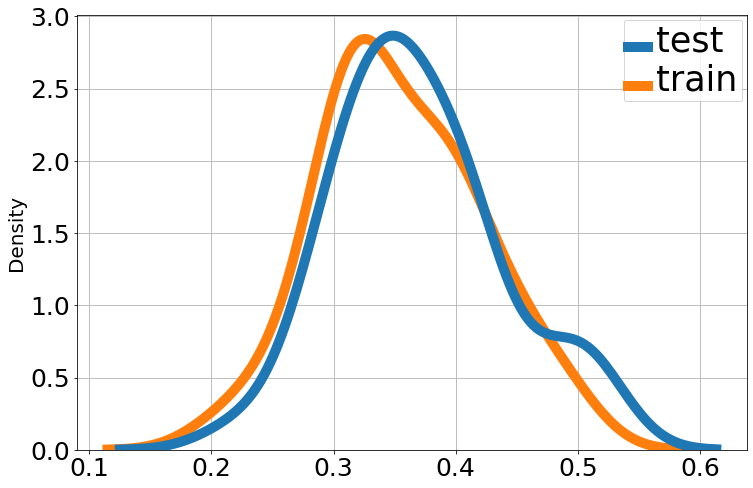

In [24]:

corr_sim = {}
corr_sim['test'] = []
corr_sim['train'] = []
mask = np.tril_indices(83,-1)
for sub in HCP_ts_test:
    corr_sim['train'].append(np.corrcoef(np.corrcoef(HCP_ts_sim[sub][:,10:])[mask], np.corrcoef(HCP_ts[sub].T)[mask])[0,1])
    corr_sim['test'].append(np.corrcoef(np.corrcoef(HCP_ts_test[sub])[mask], np.corrcoef(HCP_ts[sub].T)[mask])[0,1])
fig, ax = plt.subplots(1,1, figsize=(12,8))
plt.rcParams["axes.labelsize"] = 40
sns.kdeplot(data=corr_sim, linewidth=10)
#ax.set_title('hist of Pearson correlation between the fitting and empirical BOLD', fontsize=20)
ax.tick_params(labelsize=25)
ax.grid()
plt.setp(ax.get_legend().get_texts(), fontsize='35')
plt.setp(ax.get_legend().get_title(), fontsize='50')

# plt.savefig(base_dir+'HCP_hist_fittingcorrelation_pt.png')

[None, None]

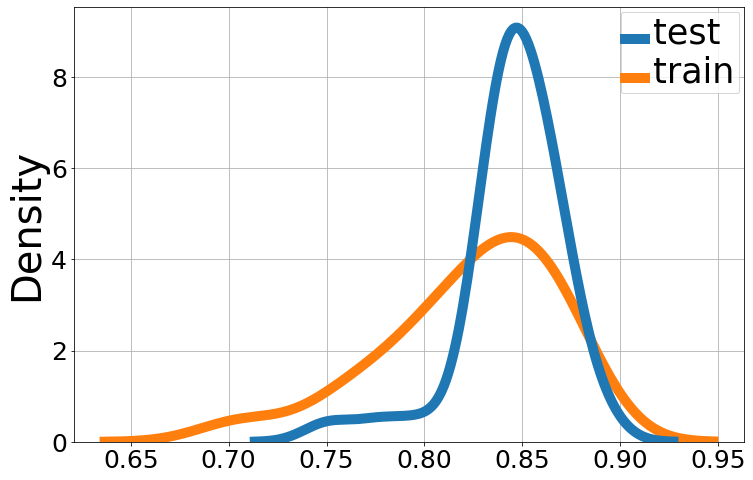

In [25]:
# cross valid for identifiability... trained on the fist 2400 and tested on the last 2400 data points
corr_sim = {}
corr_sim['test'] = []
corr_sim['train'] = []
mask = np.tril_indices(83,-1)
for sub in HCP_ts_test:
    corr_sim['train'].append(np.corrcoef(np.corrcoef(HCP_ts_sim_idt[sub][:,10:])[mask], np.corrcoef(HCP_ts_test[sub][:,:1200])[mask])[0,1])
    corr_sim['test'].append(np.corrcoef(np.corrcoef(HCP_ts_test_idt[sub])[mask], np.corrcoef(HCP_ts_test[sub][:,1200:])[mask])[0,1])
fig, ax = plt.subplots(1,1, figsize=(12,8))
plt.rcParams["axes.labelsize"] = 40
sns.kdeplot(data=corr_sim, linewidth=10)
#ax.set_title('hist of Pearson correlation between the fitting and empirical BOLD', fontsize=20)
ax.tick_params(labelsize=25)
ax.grid()
plt.setp(ax.get_legend().get_texts(), fontsize='35')
plt.setp(ax.get_legend().get_title(), fontsize='50')

## Correlation matrix of parameter fitting 

This matrix shows the correlation between the coupling strength parameters as well as the correlation coefficient on training and test data.

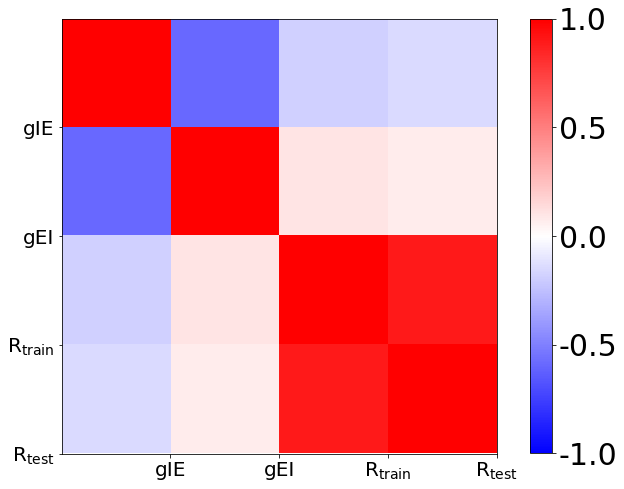

In [36]:
fig, ax = plt.subplots(1,1, figsize=(12,8))

mask = np.tril_indices(83,-1)
data_dict = {}

data_dict['gIE'] = []
data_dict['gEI'] = []

data_dict['$\mathregular{R_{train}}$'] = []
data_dict['$\mathregular{R_{test}}$'] = []
para_name = [ 'gIE', 
             'gEI', 
             '$\mathregular{R_{train}}$', 
             '$\mathregular{R_{test}}$'] #'cA', 'cB', 'cC',

for sub in HCP_para:
    
    data_dict['gIE'].append(HCP_para[sub][0])
    data_dict['gEI'].append(HCP_para[sub][1])
    
    data_dict['$\mathregular{R_{train}}$'].append(np.corrcoef(np.corrcoef(HCP_ts[sub])[mask], np.corrcoef(HCP_ts_sim[sub][:,10:])[mask])[0,1])
    data_dict['$\mathregular{R_{test}}$'].append(np.corrcoef(np.corrcoef(HCP_ts[sub])[mask], np.corrcoef(HCP_ts_test[sub])[mask])[0,1])

data_dict['gIE'] = np.array(data_dict['gIE'])
data_dict['gEI'] = np.array(data_dict['gEI'])

data_dict['$\mathregular{R_{train}}$'] = np.array(data_dict['$\mathregular{R_{train}}$'])
data_dict['$\mathregular{R_{test}}$'] = np.array(data_dict['$\mathregular{R_{test}}$'])

corr_paras = np.zeros((len(data_dict), len(data_dict)))
for i in range(len(data_dict)):
    for j in range(len(data_dict)):
        corr_paras[i,j] = np.corrcoef(data_dict[para_name[i]], data_dict[para_name[j]])[0,1]

im = ax.imshow(corr_paras, cmap='bwr', vmin = -1)
ax.set_xticks(np.linspace(0.5,3.5,4))
ax.set_yticks(np.linspace(0.5,3.5,4))
ax.set_xticklabels( para_name, fontsize=20)
ax.set_yticklabels( para_name, fontsize=20)
cbar = fig.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=30)
cbar.set_ticks(np.linspace(-1,1,5))
cbar.set_ticklabels(np.linspace(-1,1,5))
plt.show()
# fig.savefig(base_dir + 'HCP_corr_modelparas+fit_pt.png')

In [ ]:
end_time =  time.time()
print('Running time is  {0} \'s'.format(end_time - start_time ))

Running time is  1698.762948513031 's
